Original input coordinates:
[[0.  0. ]
 [1.  0. ]
 [1.  1. ]
 [0.  1. ]
 [0.  0. ]
 [0.5 0.5]]

Translated coordinates (homogeneous coordinate system):
[[0.  1.  1.  0.  0.  0.5]
 [0.  0.  1.  1.  0.  0.5]
 [1.  1.  1.  1.  1.  1. ]]

Translated coordinates:
[[1.  2.  2.  1.  1.  1.5]
 [1.  1.  2.  2.  1.  1.5]
 [1.  1.  1.  1.  1.  1. ]]

Rotated coordinates:
[[ 0.     0.707  0.    -0.707  0.     0.   ]
 [ 1.414  2.121  2.828  2.121  1.414  2.121]
 [ 1.     1.     1.     1.     1.     1.   ]]

Scaled coordinates:
[[ 0. -2. -2.  0.  0. -1.]
 [ 0.  0. -2. -2.  0. -1.]
 [ 1.  1.  1.  1.  1.  1.]]

Sheared coordinates:
[[ 3.  1.  1.  3.  3.  2.]
 [-2.  0. -2. -4. -2. -2.]
 [ 1.  1.  1.  1.  1.  1.]]


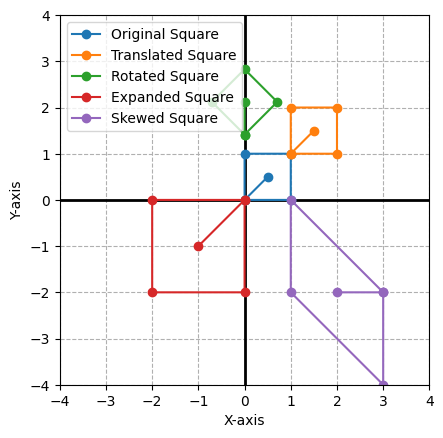

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 同次座標系変換関数
def coordinate_transformation(matrix, points):
    # 座標 (x', y', z') を (x, y, z) の値を 0 にすることで初期化を明示
    transformed_points = np.zeros_like(points)
    # この部分をコーディング
    # transformed_points = np.dot(matrix, points)  # この行と同じものを for 文で実装する
    matrix_row, matrix_column = matrix.shape
    points_column = points.shape[1]
    for i in range(matrix_row):
        for j in range(points_column):
            for k in range(matrix_column):
                transformed_points[i][j] += matrix[i][k] * points[k][j]
    return transformed_points

# 入力する点列の座標
input_points = np.array([
    [0.0, 0.0], 
    [1.0, 0.0], 
    [1.0, 1.0],
    [0.0, 1.0],
    [0.0, 0.0], 
    [0.5, 0.5], 
])

# 入力した点列の座標を表示
np.set_printoptions(precision=3, suppress=True) 
print("Original input coordinates:")
print(input_points)


# 座標を同次座標系に変換
points = np.vstack((input_points.T, np.ones(input_points.shape[0])))

# 同次座標系の座標を表示
print("\nTranslated coordinates (homogeneous coordinate system):")
print(points)

# 平行移動行列の作成 (平行移動 (1, 1))
translation_matrix = np.array([
    [1.0, 0.0, 1.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0]
])

# 平行移動行列の作成2 (平行移動 (3, 1))
translation_matrix2 = np.array([
    [1.0, 0.0, 3.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0]
])

# 回転行列の作成 (反時計回りに 45 度回転)
angle = np.radians(45)
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle), 0.0],
    [np.sin(angle),  np.cos(angle), 0.0],
    [0.0,            0.0,           1.0]
])

# 拡大・縮小行列の作成 (x 方向, y 方向ともに -2 倍)
scaling_matrix = np.array([
    [-2.0,  0.0, 0.0],
    [ 0.0, -2.0, 0.0],
    [ 0.0,  0.0, 1.0]
])

# せん断行列の作成
angle = np.radians(-45)
shear_matrix = np.array([
    [1.0,           0.0, 0.0],
    [np.tan(angle), 1.0, 0.0],
    [0.0,           0.0, 1.0]
])

# 同次座標系で座標を平行移動
translated_points = coordinate_transformation(translation_matrix, points)

# 同次座標系で座標を回転
rotated_points = coordinate_transformation(rotation_matrix, translated_points)

# 同次座標系で座標を反転拡大
scaled_points = coordinate_transformation(scaling_matrix, points)

# 同次座標系で座標をせん断
sheared_points = coordinate_transformation(np.dot(shear_matrix, translation_matrix2), scaled_points)

# 平行移動後の座標を表示
print("\nTranslated coordinates:")
print(translated_points)

# 回転後の座標を表示
print("\nRotated coordinates:")
print(rotated_points)

# 拡大後の座標を表示
print("\nScaled coordinates:")
print(scaled_points)

# せん断後の座標を表示
print("\nSheared coordinates:")
print(sheared_points)

# 描画処理
# 図と座標軸を作成
fig, ax = plt.subplots()

# 座標軸の範囲を設定
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# 座標軸のラベルを設定
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# グリッドを表示 (点線スタイル)
ax.grid(True, linestyle='--')

# アスペクト比を1:1に設定
ax.set_aspect('equal')

# x=0, y=0の軸を太線で描画
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

# 元の正方形を描画
ax.plot(points[0], points[1], marker='o', label='Original Square')

# 平行移動後の正方形を描画
ax.plot(translated_points[0], translated_points[1], marker='o', label='Translated Square')

# 平行移動後の正方形を回転させたものを描画
ax.plot(rotated_points[0], rotated_points[1], marker='o', label='Rotated Square')

# 正方形を反転拡大させたものを描画
ax.plot(scaled_points[0], scaled_points[1], marker='o', label='Expanded Square')

# 反転拡大及び平行移動後の正方形をせん断させたものを描画
ax.plot(sheared_points[0], sheared_points[1], marker='o', label='Skewed Square')

# 凡例を表示
ax.legend()

# 描画を表示
plt.show()